PIGS ANALYSIS NOTEBOOK  
Patrick M. Donnelly  
University of Washington
October 24th, 2018  

In [1]:
# import necessary databases and libraries
import pycurl,json,requests,sys,os
import pandas as pd
import numpy as np
from scipy import stats
# existing redcap API stipulates StringIO, but pycurl now works with BytesIO
from io import BytesIO

In [2]:
# get api token
# if you need an access token, consult the RedCap API page
home = os.path.expanduser('~')
with open (home+"/Desktop/redcap_apitoken_repo.txt", "r") as myfile:
    token=myfile.read().split()

In [3]:
# say which report you want
# report 27719 is the report in the screening database called "pigs_data"
pigs_report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '27719',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}
intake_report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '20197',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}

In [4]:
# specify API address
redcap_path = 'https://redcap.iths.org/api/'
# use requests module to pull data from database using api token
# and convert to csv
pull_pigs = requests.post(redcap_path, data=pigs_report)
pull_intake = requests.post(redcap_path, data=intake_report)
pigs_report_filename =os.path.join(home+'/Downloads/pigs_data.csv')
intake_report_filename =os.path.join(home+'/Downloads/intake_data.csv')
with open(pigs_report_filename, 'w') as report_file:
        report_file.write(pull_pigs.text)
pigs_data = pd.read_csv(pigs_report_filename)
with open(intake_report_filename, 'w') as report_file:
        report_file.write(pull_intake.text)
intake_data = pd.read_csv(intake_report_filename)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
plt.rcParams['pdf.fonttype'] = 42
from numpy.polynomial.polynomial import polyfit

In [6]:
for ii in range(0, len(pigs_data['record_id'])):
    if pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/237
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/237
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/223
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/223
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/301
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/301
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/300
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/300
    elif pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/301
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/301
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/300
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/300
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/237
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/237
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/223
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/223
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/259
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/259
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/258
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/258
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/359
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/359
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/333
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/333    
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/359
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/359
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/333
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/333
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/259
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/259
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/258
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/258

In [7]:
pigs_data['short_first_time'] = np.nan
pigs_data['short_first_acc']  = np.nan
pigs_data['short_first_rate']  = np.nan
pigs_data['long_first_time']  = np.nan
pigs_data['long_first_acc']  = np.nan
pigs_data['long_first_rate']  = np.nan
pigs_data['short_second_time']  = np.nan
pigs_data['short_second_acc'] = np.nan
pigs_data['short_second_rate'] = np.nan
pigs_data['long_second_time'] = np.nan
pigs_data['long_second_acc'] = np.nan
pigs_data['long_second_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    if pigs_data['pigs_group'][ii] == 'A1' or 'B1':
        pigs_data.loc[ii,'short_first_time'] = np.mean([pigs_data['pigs_p1_r1_time'][ii], pigs_data['pigs_p2_r1_time'][ii]])
        pigs_data.loc[ii,'short_first_acc'] = np.mean([pigs_data['pigs_p1_r1_acc'][ii], pigs_data['pigs_p2_r1_acc'][ii]])
        pigs_data.loc[ii,'short_first_rate'] = np.mean([pigs_data['pigs_p1_r1_rate'][ii], pigs_data['pigs_p2_r1_rate'][ii]])
        pigs_data.loc[ii,'long_first_time'] = np.mean([pigs_data['pigs_p3_r1_time'][ii], pigs_data['pigs_p4_r1_time'][ii]])
        pigs_data.loc[ii,'long_first_acc'] = np.mean([pigs_data['pigs_p3_r1_acc'][ii], pigs_data['pigs_p4_r1_acc'][ii]])
        pigs_data.loc[ii,'long_first_rate'] = np.mean([pigs_data['pigs_p3_r1_rate'][ii], pigs_data['pigs_p4_r1_rate'][ii]])
        
        pigs_data.loc[ii,'short_second_time'] = np.mean([pigs_data['pigs_p1_r2_time'][ii], pigs_data['pigs_p2_r2_time'][ii]])
        pigs_data.loc[ii,'short_second_acc'] = np.mean([pigs_data['pigs_p1_r2_acc'][ii], pigs_data['pigs_p2_r2_acc'][ii]])
        pigs_data.loc[ii,'short_second_rate'] = np.mean([pigs_data['pigs_p1_r2_rate'][ii], pigs_data['pigs_p2_r2_rate'][ii]])
        pigs_data.loc[ii,'long_second_time'] = np.mean([pigs_data['pigs_p3_r2_time'][ii], pigs_data['pigs_p4_r2_time'][ii]])
        pigs_data.loc[ii,'long_second_acc'] = np.mean([pigs_data['pigs_p3_r2_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'long_second_rate'] = np.mean([pigs_data['pigs_p3_r2_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])
    elif pigs_data['pigs_group'][ii] == 'A2' or 'B2':
        pigs_data.loc[ii,'short_first_time'] = np.mean([pigs_data['pigs_p3_r1_time'][ii], pigs_data['pigs_p4_r1_time'][ii]])
        pigs_data.loc[ii,'short_first_acc'] = np.mean([pigs_data['pigs_p3_r1_acc'][ii], pigs_data['pigs_p4_r1_acc'][ii]])
        pigs_data.loc[ii,'short_first_rate'] = np.mean([pigs_data['pigs_p3_r1_rate'][ii], pigs_data['pigs_p4_r1_rate'][ii]])
        pigs_data.loc[ii,'long_first_time'] = np.mean([pigs_data['pigs_p1_r1_time'][ii], pigs_data['pigs_p2_r1_time'][ii]])
        pigs_data.loc[ii,'long_first_acc'] = np.mean([pigs_data['pigs_p1_r1_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'long_first_rate'] = np.mean([pigs_data['pigs_p1_r1_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])
        
        pigs_data.loc[ii,'short_second_time'] = np.mean([pigs_data['pigs_p3_r2_time'][ii], pigs_data['pigs_p4_r2_time'][ii]])
        pigs_data.loc[ii,'short_second_acc'] = np.mean([pigs_data['pigs_p3_r2_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'short_second_rate'] = np.mean([pigs_data['pigs_p3_r2_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])
        pigs_data.loc[ii,'long_second_time'] = np.mean([pigs_data['pigs_p1_r2_time'][ii], pigs_data['pigs_p2_r2_time'][ii]])
        pigs_data.loc[ii,'long_second_acc'] = np.mean([pigs_data['pigs_p1_r2_acc'][ii], pigs_data['pigs_p2_r2_acc'][ii]])
        pigs_data.loc[ii,'long_second_rate'] = np.mean([pigs_data['pigs_p1_r2_rate'][ii], pigs_data['pigs_p2_r2_rate'][ii]])

In [8]:
pigs_data['word_time'] = np.nan
pigs_data['word_acc'] = np.nan
pigs_data['word_rate'] = np.nan
pigs_data['pseudo_time'] = np.nan
pigs_data['pseudo_acc'] = np.nan
pigs_data['pseudo_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'word_time'] = np.mean([pigs_data['pigs_word1_time'][ii], pigs_data['pigs_word2_time'][ii]])
    pigs_data.loc[ii, 'word_acc'] = np.mean([pigs_data['pigs_word1_acc'][ii], pigs_data['pigs_word2_acc'][ii]])
    pigs_data.loc[ii, 'word_rate'] = np.mean([pigs_data['pigs_word1_rate'][ii], pigs_data['pigs_word2_rate'][ii]])
    pigs_data.loc[ii, 'pseudo_time'] = np.mean([pigs_data['pigs_pseudo1_time'][ii], pigs_data['pigs_pseudo2_time'][ii]])
    pigs_data.loc[ii, 'pseudo_acc'] = np.mean([pigs_data['pigs_pseudo1_acc'][ii], pigs_data['pigs_pseudo2_acc'][ii]])
    pigs_data.loc[ii, 'pseudo_rate'] = np.mean([pigs_data['pigs_pseudo1_rate'][ii], pigs_data['pigs_pseudo2_rate'][ii]])

for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'word_acc_diff'] = pigs_data['word_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['word_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'pseudo_acc_diff'] = pigs_data['pseudo_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['pseudo_acc'][pigs_data['study_name'] == 41][jj-1]

In [9]:
pigs_data['short_acc'] = np.nan
pigs_data['short_rate'] = np.nan
pigs_data['long_acc'] = np.nan
pigs_data['long_rate'] = np.nan
pigs_data['first_acc'] = np.nan
pigs_data['second_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'short_acc'] = np.mean([pigs_data['short_first_acc'][ii], pigs_data['short_second_acc'][ii]])
    pigs_data.loc[ii, 'short_rate'] = np.mean([pigs_data['short_first_rate'][ii], pigs_data['short_second_rate'][ii]])
    pigs_data.loc[ii, 'long_acc'] = np.mean([pigs_data['long_first_acc'][ii], pigs_data['long_second_acc'][ii]])
    pigs_data.loc[ii, 'long_rate'] = np.mean([pigs_data['long_first_rate'][ii], pigs_data['short_second_rate'][ii]])
    pigs_data.loc[ii, 'first_acc'] = np.mean([pigs_data['short_first_acc'][ii], pigs_data['long_first_acc'][ii]])
    pigs_data.loc[ii, 'second_rate'] = np.mean([pigs_data['short_second_rate'][ii], pigs_data['long_second_rate'][ii]])
    
for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'short_acc_diff'] = pigs_data['short_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['short_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'short_rate_diff'] = pigs_data['short_rate'][pigs_data['study_name'] == 42][jj] - pigs_data['short_rate'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'long_acc_diff'] = pigs_data['long_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['long_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'long_rate_diff'] = pigs_data['long_rate'][pigs_data['study_name'] == 42][jj] - pigs_data['long_rate'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'first_acc_diff'] = pigs_data['first_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['first_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'second_rate_diff'] = pigs_data['second_rate'][pigs_data['study_name'] == 42][jj] - pigs_data['second_rate'][pigs_data['study_name'] == 41][jj-1]

In [10]:
intake_data = intake_data[['record_id', 'wj_brs', 'twre_index', 'ctopp_rapid']]
pigs_data = pigs_data.merge(intake_data, on='record_id')

In [11]:
passage_data = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_time', 
                          'short_first_acc', 'short_first_rate', 'long_first_time', 
                          'long_first_acc','long_first_rate', 'short_second_time', 
                          'short_second_acc', 'short_second_rate', 
                          'long_second_time', 'long_second_acc', 'long_second_rate']]
passage_diff_data = pigs_data[['pigs_casecontrol', 'study_name', 'first_acc_diff', 'second_rate_diff']]
wordlist_data = pigs_data[['pigs_casecontrol', 'study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
wordlist_acc_data = pigs_data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc']]
wordlist_acc_diff_data = pigs_data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = pigs_data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]
matlab_data = pigs_data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc','first_acc', 'second_rate', 'wj_brs', 'twre_index',
                         'ctopp_rapid','pigs_practice_numstories']]
first_accuracy = pigs_data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc', 'first_acc_diff']]
second_rate = pigs_data[['pigs_casecontrol', 'study_name', 'short_second_rate', 'long_second_rate', 'second_rate_diff']]


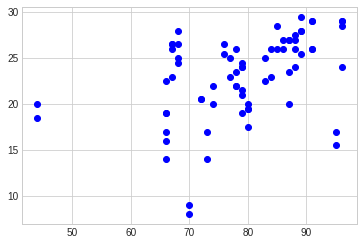

In [12]:
plt.plot(pigs_data['wj_brs'], wordlist_data['word_acc'], 'bo')
#title('initial reading score and word list improvements')

In [13]:
acc_grouped = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].mean()
acc_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].sem()

In [14]:
passage_diff_data.groupby(['pigs_casecontrol'])['first_acc_diff'].count()

pigs_casecontrol
0    16
1    15
Name: first_acc_diff, dtype: int64

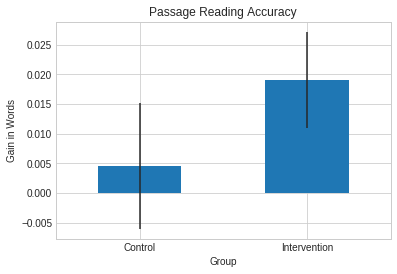

In [15]:
first_acc = acc_grouped.plot(kind='bar',style='seaborn-whitegrid', 
                             yerr=acc_grouped_error, title='Passage Reading Accuracy', rot=0)
first_acc.set_xlabel('Group')
first_acc.set_ylabel('Gain in Words')
#short_acc.legend(loc='upper left', labels=('Short Passages', 'Long Passages'))
first_acc.set_xticklabels(['Control', 'Intervention'])

#save file
plt.savefig('first_acc.pdf',transparent=True)

In [16]:
rate_grouped = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].mean()
rate_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].sem()

In [17]:
passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].count()

pigs_casecontrol
0    16
1    14
Name: second_rate_diff, dtype: int64

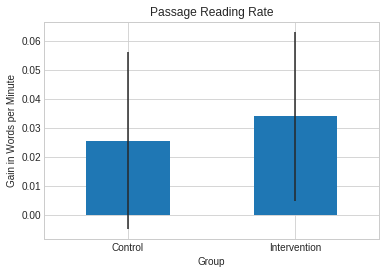

In [18]:
rate = rate_grouped.plot(kind='bar',style='seaborn-whitegrid', yerr=rate_grouped_error, 
                         title='Passage Reading Rate', rot=0)
rate.set_xlabel('Group')
rate.set_ylabel('Gain in Words per Minute')
#rate.legend(loc='upper left', labels=('Short Passages', 'Long Passages'))
rate.set_xticklabels(['Control', 'Intervention'])


#save file
plt.savefig('first_rate.pdf',transparent=True)

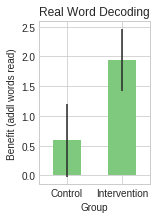

In [19]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].sem()
fig1 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, style='seaborn-whitegrid',
                                      legend=False, title='Real Word Decoding', 
                                      rot=0, figsize=(2,3),  colormap='Accent')
fig1.set_xlabel('Group')
fig1.set_ylabel('Benefit (addl words read)')
fig1.set_xticklabels(['Control', 'Intervention']), 

#save file
plt.savefig('wordlist_real.pdf',transparent=True)


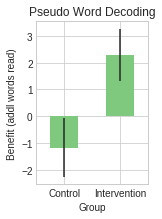

In [20]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].sem()
fig2 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, 
                                      legend=False, figsize=(2,3), fontsize=10, 
                                      colormap='Accent', title='Pseudo Word Decoding',
                                      rot=0)
fig2.set_xlabel('Group')
fig2.set_ylabel('Benefit (addl words read)')
fig2.set_xticklabels(['Control', 'Intervention'])


#save file
plt.savefig('wordlist_pseudo.pdf',transparent=True)

In [21]:
wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].count()

pigs_casecontrol
0    17
1    19
Name: pseudo_acc_diff, dtype: int64

In [22]:
wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff']

In [23]:
from scipy.stats import ttest_ind

In [24]:
word_cntrl = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
word_int = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()
pseudo_cntrl = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
pseudo_int = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()

In [25]:
ttest_ind(word_int, word_cntrl)

Ttest_indResult(statistic=1.6953189371033186, pvalue=0.099155762274876949)

In [26]:
ttest_ind(pseudo_int, pseudo_cntrl)

Ttest_indResult(statistic=2.3696163234839633, pvalue=0.02362442160504763)

In [27]:
matlab_data.to_csv(home+'/Desktop/pigs_wordlist_data.csv')

In [28]:
practice_data_sifted = pigs_data[pigs_data['study_name']==42]

In [29]:
practice_data_grpd = practice_data_sifted.groupby(['pigs_casecontrol'])['pigs_practice_numstories']

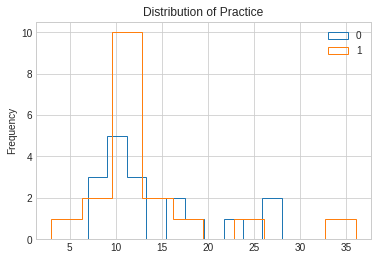

In [30]:
pracplot = practice_data_grpd.plot(kind='hist', histtype = 'step',by='pigs_casecontrol', legend=True
                        ,title='Distribution of Practice')


#save file
plt.savefig('practice_hist.pdf',transparent=True)

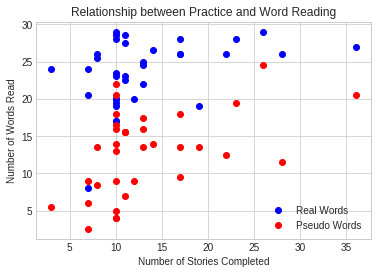

In [31]:
plt.plot(pigs_data['pigs_practice_numstories'], wordlist_data['word_acc'], 'bo')
plt.plot(pigs_data['pigs_practice_numstories'], wordlist_data['pseudo_acc'], 'ro')
plt.legend(loc='lower right', labels=('Real Words', 'Pseudo Words'))
plt.title('Relationship between Practice and Word Reading')
plt.xlabel('Number of Stories Completed')
plt.ylabel('Number of Words Read')

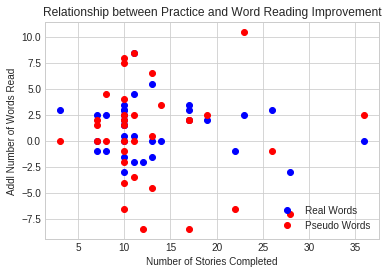

In [32]:
plt.plot(pigs_data['pigs_practice_numstories'], wordlist_acc_diff_data['word_acc_diff'], 'bo')
plt.plot(pigs_data['pigs_practice_numstories'], wordlist_acc_diff_data['pseudo_acc_diff'], 'ro')
plt.legend(loc='lower right', labels=('Real Words', 'Pseudo Words'))
plt.title('Relationship between Practice and Word Reading Improvement')
plt.xlabel('Number of Stories Completed')
plt.ylabel('Addl Number of Words Read')

In [33]:
np.correlate(pigs_data['pigs_practice_numstories'], wordlist_acc_diff_data['word_acc_diff'])

array([ nan])

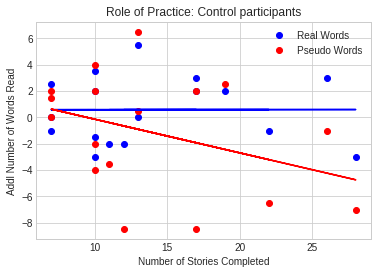

In [34]:
justcontrol = pigs_data[pigs_data['pigs_casecontrol'] == 0]
justcontrolwl = wordlist_acc_diff_data[wordlist_acc_diff_data['pigs_casecontrol'] == 0]

plt.plot(justcontrol['pigs_practice_numstories'], justcontrolwl['word_acc_diff'], 'bo')
plt.plot(justcontrol['pigs_practice_numstories'], justcontrolwl['pseudo_acc_diff'], 'ro')

idx = np.isfinite(justcontrol['pigs_practice_numstories']) & np.isfinite(justcontrolwl['word_acc_diff'])
b_w,m_w = polyfit(justcontrol['pigs_practice_numstories'][idx], justcontrolwl['word_acc_diff'][idx], 1)
b_p,m_p = polyfit(justcontrol['pigs_practice_numstories'][idx], justcontrolwl['pseudo_acc_diff'][idx], 1)
plt.plot(justcontrol['pigs_practice_numstories'][idx], b_w + m_w * justcontrol['pigs_practice_numstories'][idx], 'b')
plt.plot(justcontrol['pigs_practice_numstories'][idx], b_p + m_p * justcontrol['pigs_practice_numstories'][idx], 'r')

plt.legend(loc='upper right', labels=('Real Words', 'Pseudo Words'))
plt.title('Role of Practice: Control participants')
plt.xlabel('Number of Stories Completed')
plt.ylabel('Addl Number of Words Read')


#save file
plt.savefig('practice_wl_control.pdf',transparent=True)

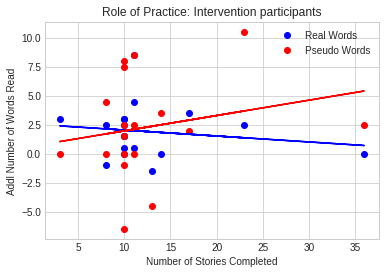

In [35]:
justpigs = pigs_data[pigs_data['pigs_casecontrol'] == 1]
justpigswl = wordlist_acc_diff_data[wordlist_acc_diff_data['pigs_casecontrol'] == 1]

plt.plot(justpigs['pigs_practice_numstories'], justpigswl['word_acc_diff'], 'bo')
plt.plot(justpigs['pigs_practice_numstories'], justpigswl['pseudo_acc_diff'], 'ro')

idx = np.isfinite(justpigs['pigs_practice_numstories']) & np.isfinite(justpigswl['word_acc_diff'])
b_w,m_w = polyfit(justpigs['pigs_practice_numstories'][idx], justpigswl['word_acc_diff'][idx], 1)
b_p,m_p = polyfit(justpigs['pigs_practice_numstories'][idx], justpigswl['pseudo_acc_diff'][idx], 1)
plt.plot(justpigs['pigs_practice_numstories'][idx], b_w + m_w * justpigs['pigs_practice_numstories'][idx], 'b')
plt.plot(justpigs['pigs_practice_numstories'][idx], b_p + m_p * justpigs['pigs_practice_numstories'][idx], 'r')


plt.legend(loc='upper right', labels=('Real Words', 'Pseudo Words'))
plt.title('Role of Practice: Intervention participants')
plt.xlabel('Number of Stories Completed')
plt.ylabel('Addl Number of Words Read')

#save file
plt.savefig('practice_wl_int.pdf',transparent=True)

In [36]:
stats.pearsonr(justpigs['pigs_practice_numstories'][justpigs['study_name']==42], justpigswl['pseudo_acc_diff'].dropna())

(nan, 1.0)

In [37]:
matlab_data

,record_id,int_session,pigs_casecontrol,study_name,pigs_word1_acc,pigs_word2_acc,pigs_pseudo1_acc,pigs_pseudo2_acc,first_acc,second_rate,wj_brs,twre_index,ctopp_rapid,pigs_practice_numstories
0,274,1,0,41,21,17,11,11,0.919436,0.658500,79.0,63.0,76.0,NaN
1,274,2,0,42,24,25,16,19,0.931596,0.800250,79.0,63.0,76.0,13.0
2,280,1,0,41,23,21,12,19,0.880570,0.476500,78.0,64.0,76.0,NaN
3,280,2,0,42,24,20,17,15,0.845448,0.455000,78.0,64.0,76.0,13.0
4,428,1,0,41,20,21,4,4,0.725401,0.630500,72.0,59.0,76.0,NaN
5,428,2,0,42,23,18,10,2,0.820449,0.591500,72.0,59.0,76.0,7.0
6,429,1,0,41,25,18,12,6,0.878375,0.760750,79.0,68.0,76.0,NaN
7,429,2,0,42,27,21,4,14,0.777915,0.589000,79.0,68.0,76.0,7.0
8,486,1,1,41,28,25,16,20,0.930997,1.353500,68.0,69.0,88.0,NaN
9,486,2,1,42,28,22,13,14,0.951297,1.451500,68.0,69.0,88.0,13.0
